In [1]:
import pandas as pd
import numpy as np
from StringIO import StringIO
from zipfile import ZipFile
from urllib import urlopen
import requests
import csv
import matplotlib.pylab as plt
import seaborn as sns
import pylab as pylab
from collections import OrderedDict
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

/opt/ds/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def unzip_file(year):
    file_path = 'data/{}_sqf_csv.zip'.format(year)
    zipdir = ZipFile(file_path)
    zipdir.extractall('data')

In [5]:
def unzip_read_file(year):
    url = urlopen("http://www.nyc.gov/html/nypd/downloads/zip/analysis_and_planning/{}_sqf_csv.zip".format(year))
    zipfile = ZipFile(StringIO(url.read()))
    try:
        with zipfile.open("{}.csv".format(year)) as file:
            df = pd.read_csv(file)
    except: # 2015 csv name is different format than all the rest...go figure.
        with zipfile.open("{}_sqf_csv.csv".format(year)) as file:
            df = pd.read_csv(file)
    return df

In [6]:
df2015 = unzip_read_file(2015)

In [19]:
# Data cleaning to generate numeric values


d = {'Y': True, 'N': False}
df2015 = df2015.replace(d)
df2015 = df2015*1

# "get numeric data" only takes numeric data in the df, it was a quick
# and easy way to get PCA to work, but it ignores a lot of key variables
# like race and crime suspected of. However, it still retains a majority of
# variables (75/112 variables)

df2015Num = df2015._get_numeric_data()
df2015Num.shape

(22563, 75)

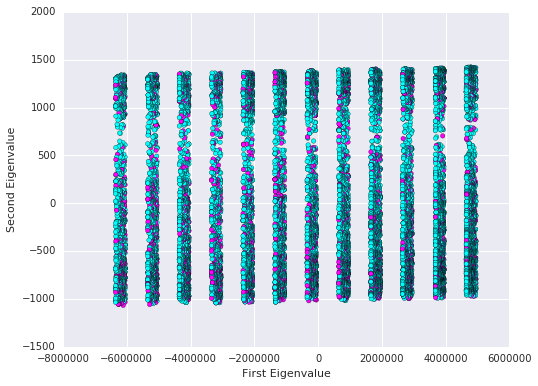

In [8]:
n=3 # how many eigenvectors we choose
pca = PCA(n)
Proj = pca.fit_transform(df2015Num)
eigenvalues = pca.explained_variance_
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Proj[:, 0], Proj[:, 1], c=df2015.arstmade, cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.show()

## This is the plot of the first two eigenvectors colored by "arrest made". The "datestop" variable is "overwhelming" the rest of the data, causing the 12 clusters we see here. I'll remove this variable later on.

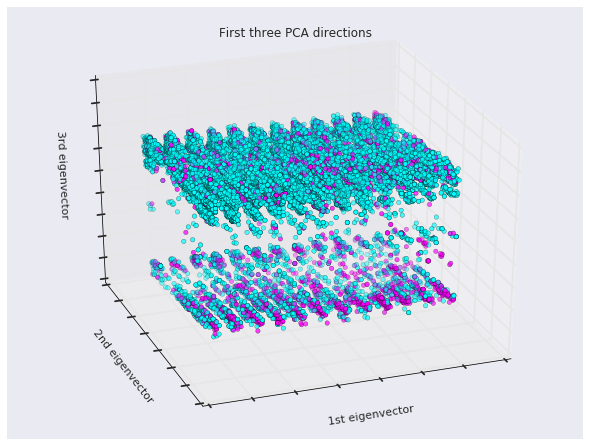

In [10]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(Proj[:, 0], Proj[:, 1], Proj[:, 2],c=df2015.arstmade,
           cmap=plt.cm.cool)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [17]:
dfNoDate = df2015Num.drop(['datestop'],axis=1)

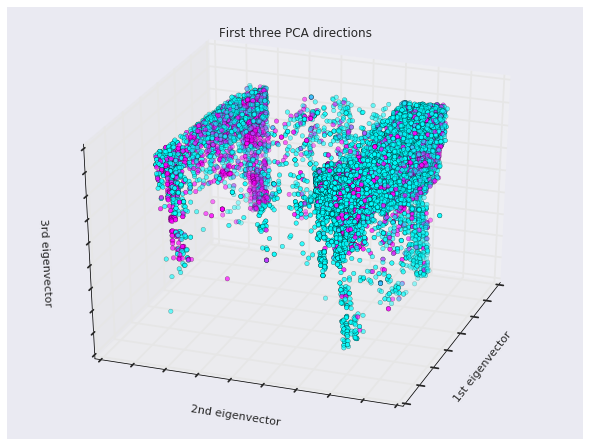

In [23]:
n=3 # how many eigenvectors we choose
pca = PCA(n)
Proj = pca.fit_transform(dfNoDate)
eigenvalues = pca.explained_variance_
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=160)
ax.scatter(Proj[:, 0], Proj[:, 1], Proj[:, 2],c=df2015.arstmade,
           cmap=plt.cm.cool)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

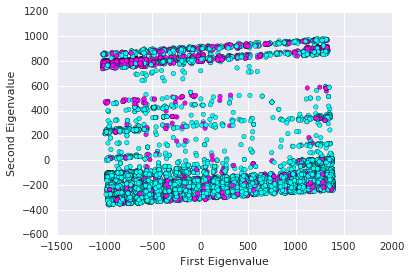

In [24]:
plt.clf()
# Plot the training points
plt.scatter(Proj[:, 0], Proj[:, 1], c=df2015.arstmade, cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.show()

## It's starting to look a little more "clustery"... let's see what happens when we remove "timestop" as well

In [25]:
dfNoDateTime = dfNoDate.drop(['timestop'],axis=1)

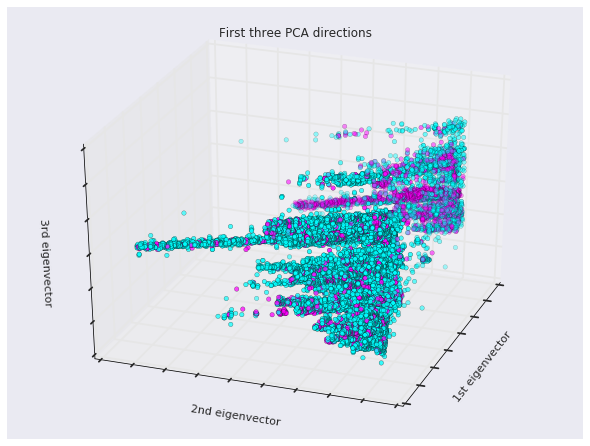

In [27]:
n=3 # how many eigenvectors we choose
pca = PCA(n)
Proj = pca.fit_transform(dfNoDateTime)
eigenvalues = pca.explained_variance_
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=160)
ax.scatter(Proj[:, 0], Proj[:, 1], Proj[:, 2],c=df2015.arstmade,
           cmap=plt.cm.cool)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

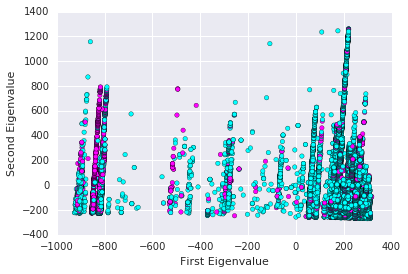

In [35]:
plt.clf()
# Plot the training points
plt.scatter(Proj[:, 0], Proj[:, 1], c=df2015.arstmade, cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.show()

## I'm starting to see more patterns here! It looks like there's a cluster on the left where "Arrest Made" (pink color) is more prominent. Time to see what the major shared characteristics of that cluster are... to be continued.